<a href="https://colab.research.google.com/github/shubhamksingh1/TimeSeries/blob/main/AppliedTimeSeriesAnalysisWithPython/AppliedTimeSeriesAnalysisWithPython_HOTSAP_fbprophet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecast Bus Ridership

In [ ]:
import numpy as np
import pandas as pd
from itertools import product
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Udemy_Courses/AppliedTimeSeriesAnalysisWithPython/portland-oregon-average-monthly-.csv')
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [ ]:
df.Month = pd.to_datetime(df.Month)
# df['Month'] = df['Month'].astype('datetime64[ns]')

In [ ]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [ ]:
df.tail()

,ds,y
109,1969-02-01,1425
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,114.0,1120.54386,270.888317,613.0,885.0,1158.0,1340.0,1558.0


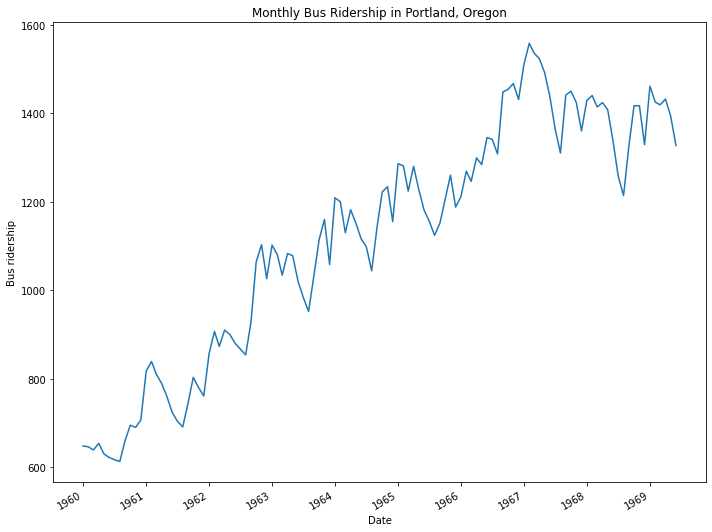

In [ ]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.ds, df.y)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Bus ridership')

ax.set_title('Monthly Bus Ridership in Portland, Oregon')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Hyperparameter tuning

In [ ]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

cutoffs = pd.date_range(start='1963-01-01', end='1969-06-01', freq='6MS')

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(df)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['rmse'] = rmses

best_params = params[np.argmin(rmses)]

print(best_params)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/13 [00:00<?, ?it/s]

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


# Fit best model

In [ ]:
m = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.01
)
m.add_country_holidays(country_name='US')
m.fit(df);


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Make forecasts

In [ ]:
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
121,1970-01-31
122,1970-02-28
123,1970-03-31
124,1970-04-30
125,1970-05-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,1970-01-31,1648.653569,1537.929254,1758.335361
122,1970-02-28,1627.242468,1512.605696,1735.706047
123,1970-03-31,1651.402899,1547.525989,1763.296181
124,1970-04-30,1633.835144,1525.421823,1745.846824
125,1970-05-31,1611.023968,1499.336708,1722.593149


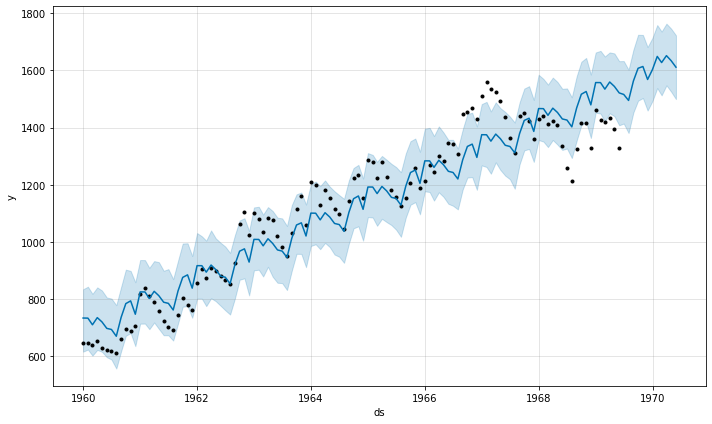

In [ ]:
forecast_fig = m.plot(forecast)

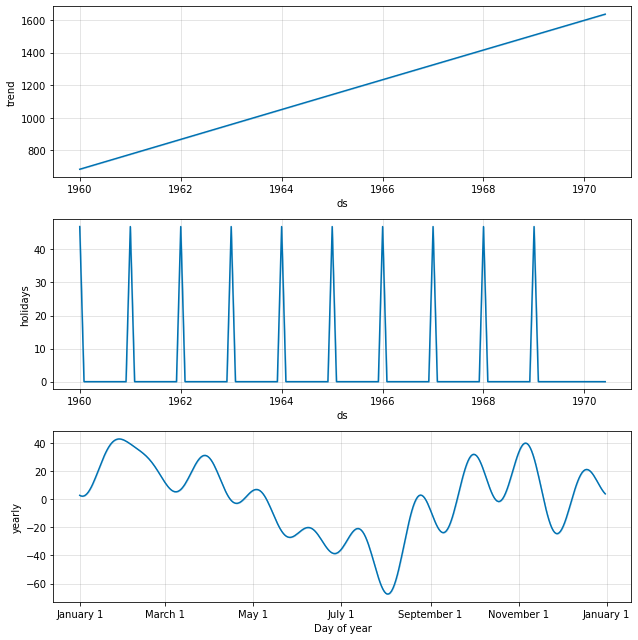

In [ ]:
components_fig = m.plot_components(forecast)

# Performance metrics

  0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


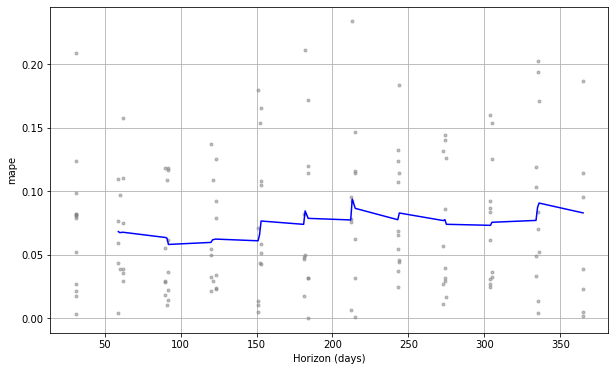

In [ ]:
df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv)

fig = plot_cross_validation_metric(df_cv, metric='mape')